In [51]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as stats
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.stats.power as smp

# **Exercise 3.5**

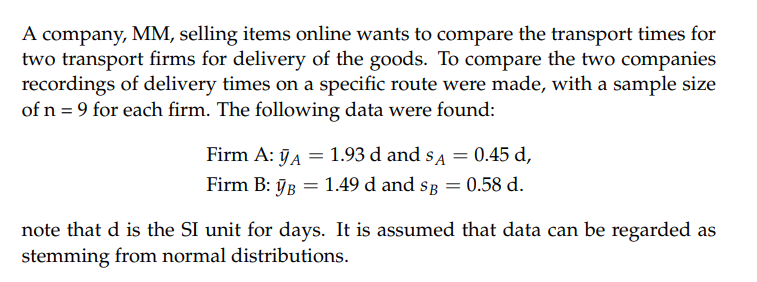

### **We want to test the following hypothesis**

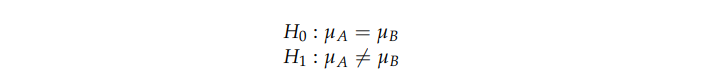

### **What is the p-value, interpretation and conclusion for this test (at α = 5% level)?**

#### **Solution:**

Husk dette fra noterne:

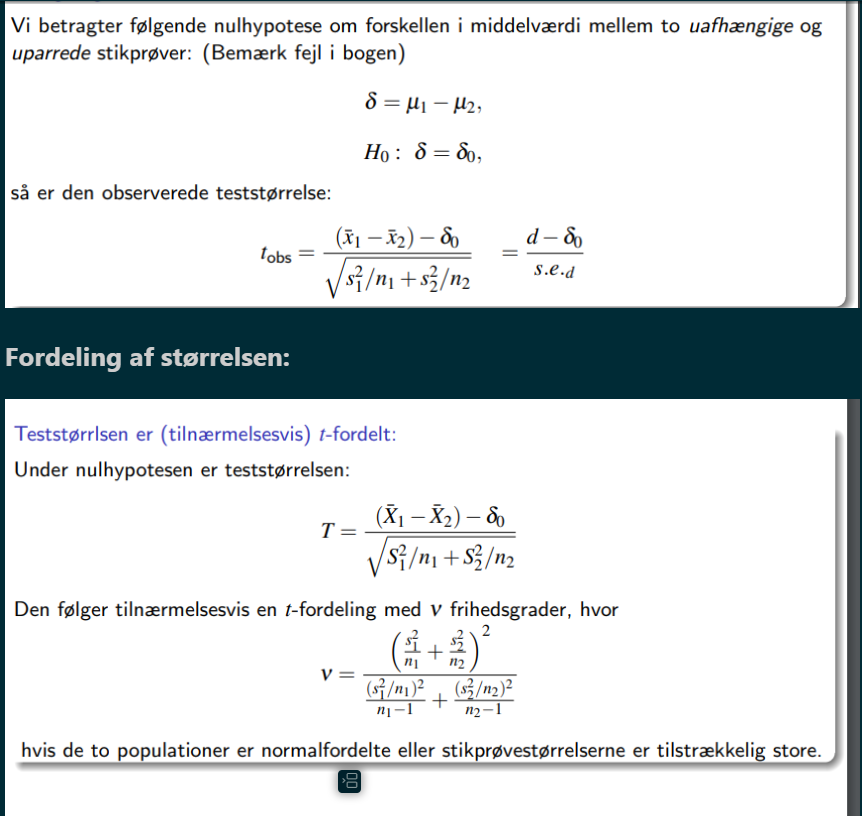

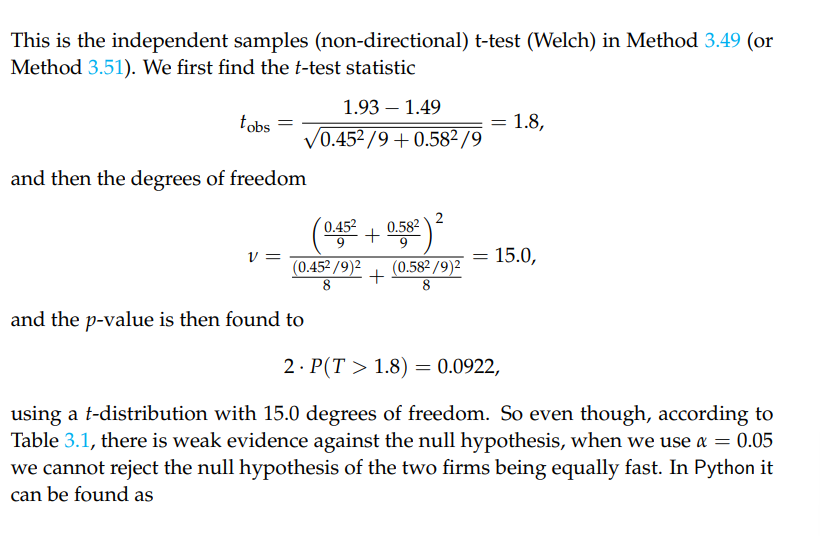

Metode:

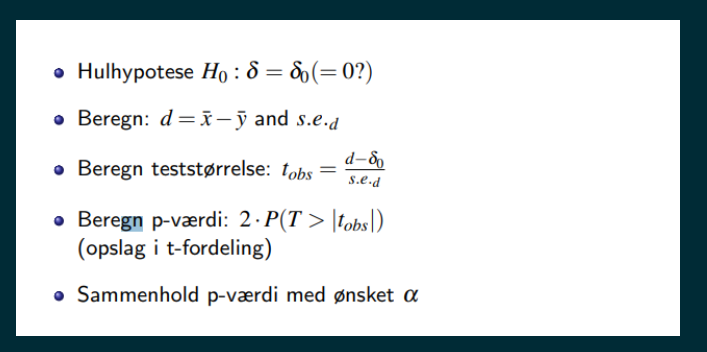

Husk disse værdier fra opgaven:
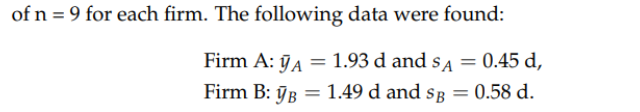

In [68]:
ms = np.array([1.93,1.49])

vs = np.array([0.45**2, 0.58**2]) # variances

ns = np.array([9,9]) # sample size

t_obs = (ms[0]-ms[1])/np.sqrt(vs[0]/ns[0]+vs[1]/ns[1])

nu = sum(vs / ns)**2 / sum((vs / ns)**2 / (ns - 1)) # degrees of freedom
print(t_obs)

print(nu)

print(f'p value is: {2*(1-stats.t.cdf(t_obs,df=nu))}')


1.7981248351046575
15.069646790733499
p value is: 0.09221726347624926


### **b) Find the 95% confidence interval for the mean difference µA − µB.**

We need the degrees of freedom - we found that number above: ν = 15.0. Since the
relevant t-quantile then is, using ν = 15.0,

In [71]:

CI = 1.93-1.49 + np.array([-1,1])*stats.t.ppf(0.975,df=15.0)*np.sqrt(0.45**2/9+0.58**2/9)
print(CI)



[-0.08156434  0.96156434]


In [54]:
# or

# Calculate the mean difference
mean_diff = 1.93 - 1.49

# Degrees of freedom, approximate if from previous context or calculations
df = 15.0

# Critical t-value for 95% confidence interval
t_critical = stats.t.ppf(0.975, df=df)

# Standard error of the difference in means
se_diff = np.sqrt((0.45**2)/9 + (0.58**2)/9)

# Confidence interval calculation
CI = mean_diff + np.array([-1, 1]) * t_critical * se_diff

# Print the confidence interval
print("Confidence Interval:", CI)


Confidence Interval: [-0.08156434  0.96156434]


### **c) What is the power of a study with n = 9 observations in each of the two samples of detecting a potential mean difference of 0.4 between the firms (assume that σ = 0.5 and that we use α = 0.05)?**

In [55]:
n = 9
delta = 0.4
sd = 0.5
alpha = 0.05
print(smp.TTestIndPower().solve_power(nobs1=n, effect_size = delta/sd,alpha=alpha))

0.35794895150011175


### **d) What effect size (mean difference) could be detected with n = 9 observations in each of the two samples with a power of 0.8 (assume that σ = 0.5and that we use α = 0.05)?**

Remember that:
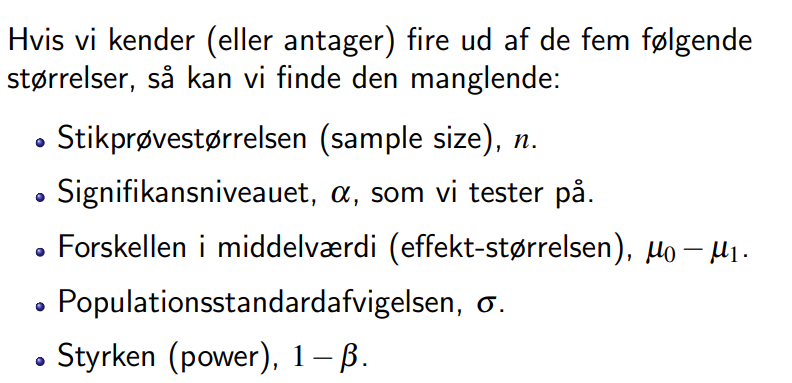

In [56]:
n = 9
power = 0.8
sd = 0.5
alpha = 0.05
effect = smp.TTestIndPower().solve_power(nobs1=n, alpha=alpha,
power=power)
delta = effect*sd
print(delta)

0.7034623345972915


So a potential mean difference of 0.70 is detectable with probability 0.8 by such a
study.


### **e) How large a sample size (from each firm) would be needed in a new investigation, if we want to detect a potential mean difference of 0.4 between the firms with probability 0.90, that is with power=0.90 (assume that σ = 0.5 and that we use α = 0.05)?**

In [57]:
power = 0.9
sd = 0.5
delta = 0.4
alpha = 0.05
print(smp.TTestIndPower().solve_power(effect_size=delta/sd,alpha=alpha, power=power))

33.82554384917234


So n = 34 in each sample would do the job!

---

# **Exercise 3.6 Cholesterol**

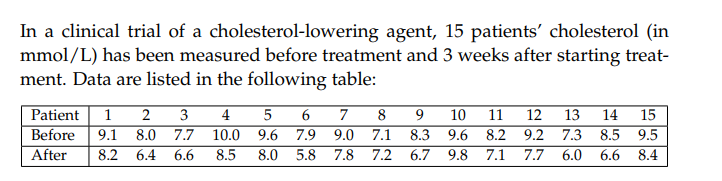

In [58]:
x1 = np.array([9.1, 8.0, 7.7, 10.0, 9.6, 7.9, 9.0, 7.1,
8.3, 9.6, 8.2, 9.2, 7.3, 8.5, 9.5])

x2 = np.array([8.2, 6.4, 6.6, 8.5, 8.0, 5.8, 7.8, 7.2,
6.7, 9.8, 7.1, 7.7, 6.0, 6.6, 8.4])

# Independent
t_obs,p_val = stats.ttest_ind(x1,x2,equal_var=False)
print(t_obs, p_val)

# Paired
t_obs,p_val = stats.ttest_rel(x1,x2)
print(t_obs,p_val)



3.3206371615181602 0.0025776851099507973
7.340653674886342 3.6722518645935146e-06


This is clearly a paired setting so only the results from the last of the Python-calls are
relevant, where we can read off the results:
The (non-directional) p-value is 0.00000367, so there is very strong evidence against
the null hypothesis, and we can beyond any reasonable doubts conclude that the
mean cholesterol level has decreased after the 3 weeks.

---

# **3.7 Pulse**

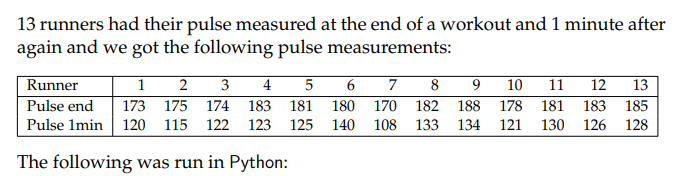

In [59]:
Pulse_end = np.array([173,175,174,183,181,180,170,
182,188,178,181,183,185])
Pulse_1min = np.array([120,115,122,123,125,140,108,
133,134,121,130,126,128])

print(np.mean(Pulse_end))

print(np.mean(Pulse_1min))

print(np.std(Pulse_end, ddof=1))

print(np.std(Pulse_1min, ddof=1))

print(np.std(Pulse_end-Pulse_1min, ddof=1))



179.46153846153845
125.0
5.189980485117207
8.406346808612328
5.767948575466911


### **a) What is the 99% confidence interval for the mean pulse drop (meaning thedrop during 1 minute from end of workout)?**

The variable res in the code snippet you provided is the result of performing a paired t-test on two sets of data: Pulse_end and Pulse_1min. The stats.ttest_rel function is used from the scipy.stats module, which conducts a t-test for the mean difference of two related samples (also known as dependent samples or paired samples). This is useful for comparing two measurements taken under different conditions from the same subjects.

Here's what each part of the res object represents:

res.statistic: This is the test statistic for the t-test. It quantifies the distance of the sample mean from the null hypothesis mean, measured in units of the standard error. A higher absolute value of the statistic indicates a greater deviation from the null hypothesis.
res.pvalue: This is the p-value associated with the test statistic. It represents the probability of observing data as extreme as those observed if the null hypothesis of no difference is true. A small p-value (typically less than 0.05) would lead to rejecting the null hypothesis, suggesting a statistically significant difference between the two conditions measured.
In summary, res holds the results of the paired t-test, and accessing res.statistic and res.pvalue allows you to interpret the test's outcome in terms of statistical significance and the magnitude of the observed effect.

In [60]:
res = stats.ttest_rel(Pulse_end,Pulse_1min)
print(res.statistic, res.pvalue)

# Confidence interval
(CI_low,CI_high) = res.confidence_interval(confidence_level=0.99)
print(CI_low,CI_high)



34.043970207871624 2.624171406710289e-13
49.575065928685966 59.348010994390954


### **b) Consider now the 13 pulse end measurements (first row in the table). What is the 95% confidence interval for the standard deviation of these?**

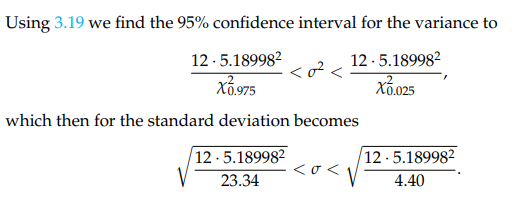

In [61]:
ttest = stats.ttest_rel(Pulse_end,Pulse_1min)
print(ttest.statistic, ttest.pvalue)

CI_var = (12 * np.var(Pulse_end,ddof=1)) / stats.chi2.ppf((0.975,0.025),
df=12)
CI_std = np.sqrt(CI_var)
print(CI_var)

print(CI_std)



34.043970207871624 2.624171406710289e-13
[13.85077006 73.39834071]
[3.72166227 8.56728316]


So, the answer is that we accept that σ ∈ [3.72; 8.57] or we could write 3.72 < σ <
8.57.

---

# **3.8 Foil production**

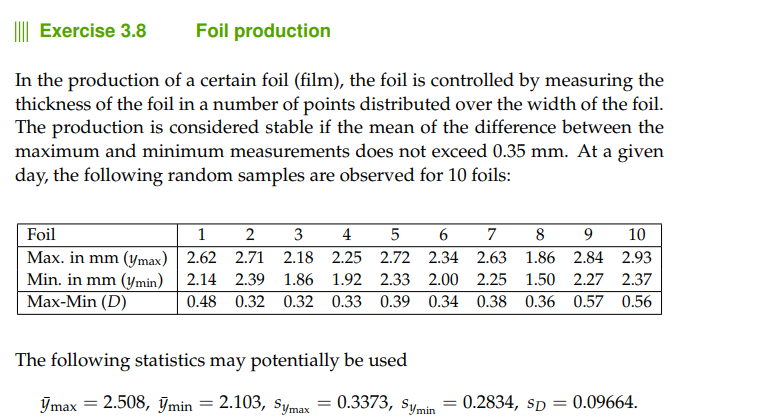

### **a) What is a 95% confidence interval for the mean difference?**

In [62]:
y_max = [2.62, 2.71, 2.18, 2.25, 2.72, 2.34, 2.63, 1.86, 2.84, 2.93]
y_min = [2.14, 2.39, 1.86, 1.92, 2.33, 2.00,2.25, 1.50, 2.27, 2.37]

res = stats.ttest_rel(y_max, y_min)
print(res.statistic, res.pvalue)

# Confidence interval
(CI_low,CI_high) = res.confidence_interval(confidence_level=0.95)
print(CI_low,CI_high)

#[0.336 0.474]

13.252793134937777 3.2907033216894523e-07
0.33586939171029234 0.4741306082897076


### **b) How much evidence is there that the mean difference is different from 0.35? State the null hypothesis, t-statistic and p-value for this question**

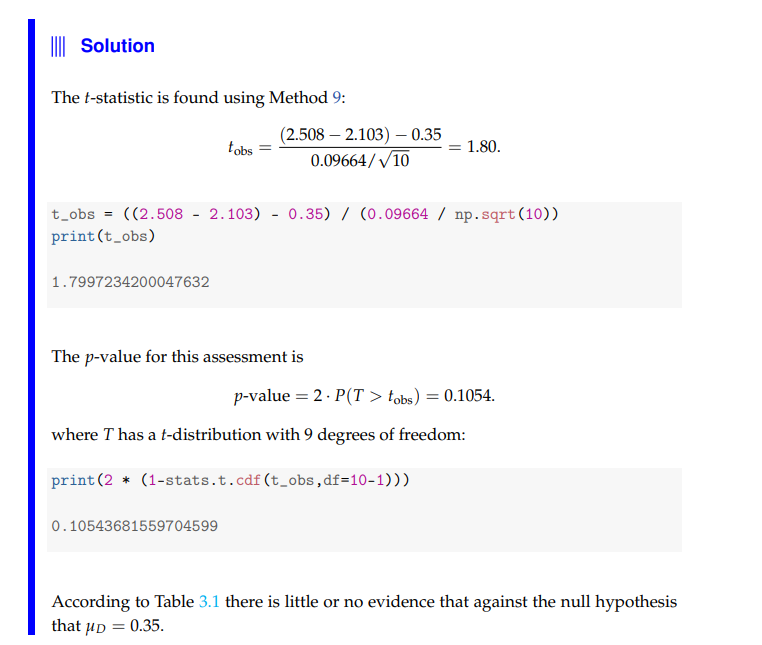

---

# **3.9 Course project**

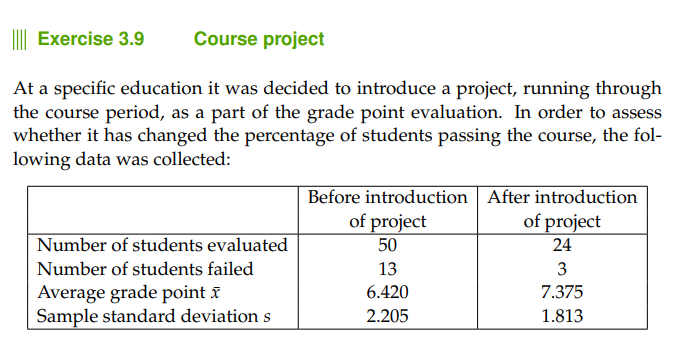

### **a) As it is assumed that the grades are approximately normally distributed in each group, the following hypothesis is tested:**

### **H0 : µBefore = µAfter,**
### **H1 : µBefore ̸= µAfter.**

### **The test statistic, the p-value and the conclusion for this test become?**


In [65]:
print(2*(1-stats.t.cdf(1.97,54.4)))


0.05393786409352663


In [63]:
ms = np.array([6.42,7.375])
vs = np.array([2.205**2, 1.813**2])
ns = np.array([50,24])
t_obs = (ms[0]-ms[1])/np.sqrt(vs[0]/ns[0]+vs[1]/ns[1])
nu = sum(vs / ns)**2 / sum((vs / ns)**2 / (ns - 1))
print(t_obs)

print(nu)


-1.9733867395024223
54.38590559936726


On a 5% level we cannot conclude a significant difference in the grade point means
before and after

or:

In [64]:
# Data from before the project introduction
n_before = 50
mean_before = 6.420
std_dev_before = 2.205

# Data from after the project introduction
n_after = 24
mean_after = 7.375
std_dev_after = 1.813

# Calculate the pooled standard error of the mean (SEM)
sem_before = std_dev_before / np.sqrt(n_before)
sem_after = std_dev_after / np.sqrt(n_after)
sem_pooled = np.sqrt(sem_before**2 + sem_after**2)

# Calculate the t-statistic for independent two-sample t-test
t_statistic = (mean_before - mean_after) / sem_pooled

# Calculate degrees of freedom using the Welch-Satterthwaite equation
df = (sem_before**2 + sem_after**2)**2 / ((sem_before**4 / (n_before - 1)) + (sem_after**4 / (n_after - 1)))

# Calculate the p-value for two-tailed test
p_value = 2 * stats.t.cdf(-abs(t_statistic), df=df)

# Print results
print(f"T-statistic: {t_statistic}")
print(f"Degrees of Freedom: {df}")
print(f"P-value: {p_value}")

# Conclusion based on p-value
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis - suggest a significant difference in the means before and after the project.")
else:
    print("Fail to reject the null hypothesis - no significant difference in the means before and after the project.")


T-statistic: -1.9733867395024223
Degrees of Freedom: 54.38590559936724
P-value: 0.0535416692874589
Fail to reject the null hypothesis - no significant difference in the means before and after the project.


### **b) A 99% confidence interval for the mean grade point difference is?**

In [66]:
CI = (6.42-7.375) + np.array([-1,1])*stats.t.ppf(0.995,df=54.4)*np.sqrt(2.205**2/50 + 1.813**2/24)
print(CI)

[-2.24676509  0.33676509]


### **c) A 95% confidence interval for the grade point standard deviation after the introduction of the project becomes?**

In [67]:
CI_std = np.sqrt((23*1.813**2)/stats.chi2.ppf((0.975,0.025),23))
print(CI_std)

[1.40908823 2.54320499]
